### Importing modules

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [135]:
data = pd.read_csv('Merger and Acquisitions by Tech Companies.csv')

In [136]:
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [137]:
data.shape

(1455, 10)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


In [139]:
data.columns

Index(['ID', 'Parent Company', 'Acquisition Year', 'Acquisition Month',
       'Acquired Company', 'Business', 'Country', 'Acquisition Price',
       'Category', 'Derived Products'],
      dtype='object')

### Checking for null values

In [140]:
data.isnull().sum()

ID                   0
Parent Company       0
Acquisition Year     0
Acquisition Month    0
Acquired Company     0
Business             0
Country              0
Acquisition Price    0
Category             0
Derived Products     0
dtype: int64

### Replacing "-" with NaN values

In [141]:
data = data.replace({"-":np.nan})

In [142]:
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


### Which columns contain missing/ NaN values?

In [143]:
data.isna().any()

ID                   False
Parent Company       False
Acquisition Year      True
Acquisition Month     True
Acquired Company     False
Business              True
Country               True
Acquisition Price     True
Category              True
Derived Products      True
dtype: bool

In [144]:
data['Country'].count()

341

In [145]:
data.dtypes

ID                    int64
Parent Company       object
Acquisition Year     object
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
Acquisition Price    object
Category             object
Derived Products     object
dtype: object

### Convert Year and Price to "int" from "objects"

In [146]:
data['Acquisition Year'] = pd.to_numeric(data['Acquisition Year'])

In [147]:
data['Acquisition Price'] = pd.to_numeric(data['Acquisition Price'], errors='coerce')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1455 non-null   int64  
 1   Parent Company     1455 non-null   object 
 2   Acquisition Year   1427 non-null   float64
 3   Acquisition Month  1397 non-null   object 
 4   Acquired Company   1455 non-null   object 
 5   Business           1181 non-null   object 
 6   Country            341 non-null    object 
 7   Acquisition Price  383 non-null    float64
 8   Category           10 non-null     object 
 9   Derived Products   403 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 113.8+ KB


In [149]:
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


### What's the range of numerical values?

In [150]:
data.describe()

,ID,Acquisition Year,Acquisition Price
count,1455.000000,1427.000000,3.830000e+02
mean,728.000000,2009.676945,1.357384e+09
std,420.166634,8.056344,5.526084e+09
min,1.000000,1957.000000,2.000000e+05
25%,364.500000,2006.000000,4.725000e+07
50%,728.000000,2011.000000,1.510000e+08
75%,1091.500000,2015.000000,5.500000e+08
max,1455.000000,2021.000000,7.130000e+10


### Check month column

In [151]:
data['Acquisition Month'].unique()

array(['Mar', 'Jun', 'Jul', 'Jan', 'Feb', 'Sep', 'Nov', 'Apr', nan, 'May',
       'Dec', 'Oct', 'Aug'], dtype=object)

### Data Visualization and Statistical Analysis

#### Acquisitions through the years

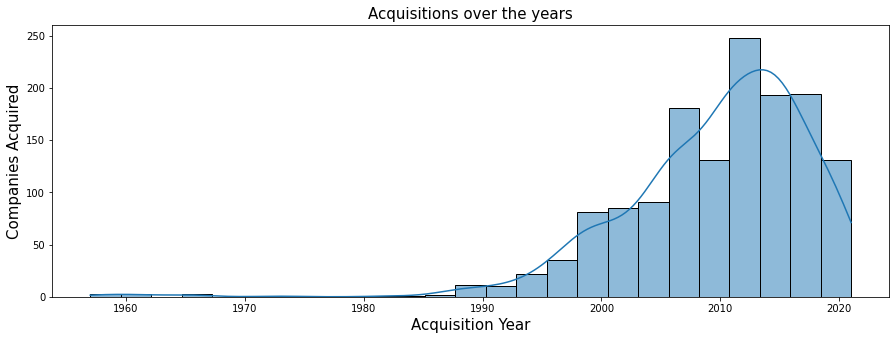

In [152]:
plt.figure(figsize=(15,5))
sns.histplot(x=data['Acquisition Year'], kde=True, bins=25)
plt.title("Acquisitions over the years",fontsize=15)
plt.xlabel("Acquisition Year",fontsize=15)
plt.ylabel("Companies Acquired", fontsize=15)
plt.show()

### Is there a particular time of the year when companies are acquired?

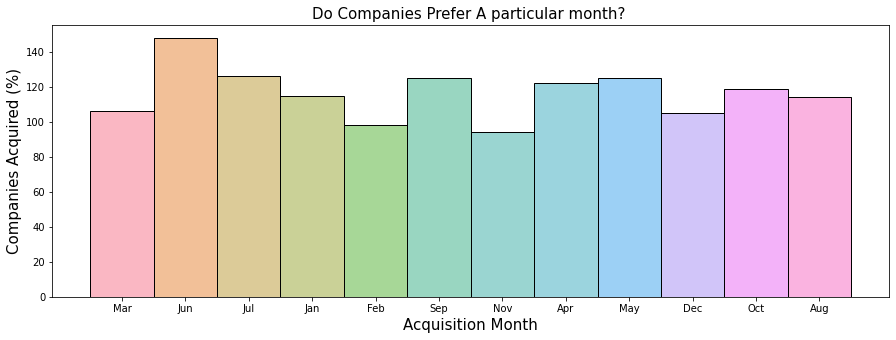

In [153]:
plt.figure(figsize=(15,5))
sns.histplot(x=data['Acquisition Month'], hue=data['Acquisition Month'], legend=False)
plt.title("Do Companies Prefer A particular month? ",fontsize=15)
plt.xlabel("Acquisition Month", fontsize=15)
plt.ylabel("Companies Acquired (%)", fontsize=15)
plt.show()

### Most Acquisitions by comapnies

In [154]:
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


In [155]:
companies = data['Parent Company'].value_counts().reset_index()
companies = companies.rename({'index':'Company','Parent Company':'Acquired Companies'}, axis=1)

In [156]:
companies

,Company,Acquired Companies
0,Microsoft,258
1,Google,244
2,Ibm,182
3,Hp,129
4,Apple,123
5,Amazon,108
6,Facebook,93
7,Twitter,65
8,Ebay,63
9,Adobe,52


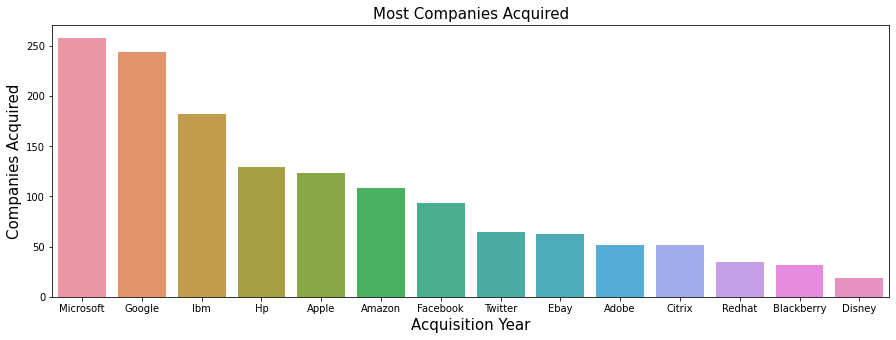

In [157]:
plt.figure(figsize=(15,5))
sns.barplot(data=companies, x='Company', y='Acquired Companies')
plt.title("Most Companies Acquired", fontsize=15)
plt.xlabel("Acquisition Year", fontsize=15)
plt.ylabel("Companies Acquired", fontsize=15)
plt.show()

### Was there a Company Acquired Multiple times?

In [158]:
data['Acquired Company'].value_counts().head()

Disneyland, Inc.       2
Wrather Corporation    2
Magento                2
Blackthorne            1
mobile.de              1
Name: Acquired Company, dtype: int64

### Most common types of businesses acquired

In [159]:
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


In [160]:
business = data['Business'].value_counts().reset_index()
business = business.rename({"index": "Business", "Business": "Number of Companies"}, axis=1)

In [161]:
business.head(10)

,Business,Number of Companies
0,Software,52
1,Computer software,37
2,Video games,18
3,Information technology,15
4,Internet software,12
5,Classified advertising,8
6,Information technology consulting,7
7,Electronic commerce,7
8,Online auction,6
9,Artificial intelligence,6


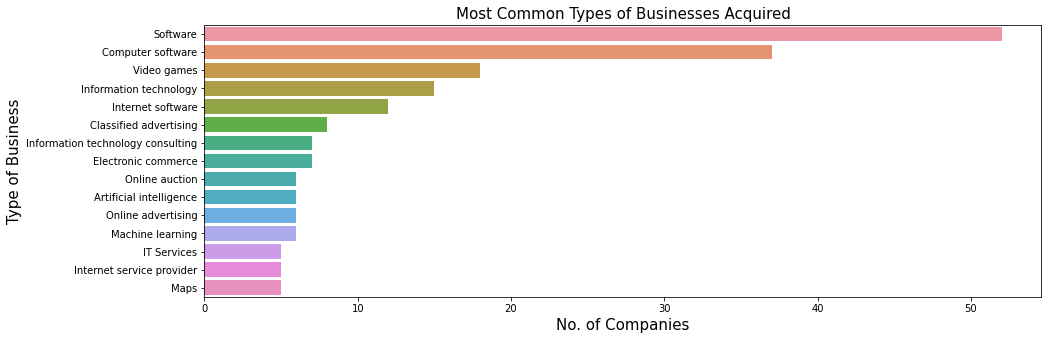

In [162]:
plt.figure(figsize=(15,5))
sns.barplot(data=business.head(15), x='Number of Companies', y='Business')
plt.title("Most Common Types of Businesses Acquired",fontsize=15)
plt.xlabel("No. of Companies", fontsize=15)
plt.ylabel("Type of Business", fontsize=15)
plt.show()

### Does the "Category" variable have any significance?

In [163]:
data['Category'].value_counts()

Twitter Cortex              2
Mobile Twitter app (iOS)    1
Analytics tools             1
Revenue team                1
Revenue engineering team    1
Design                      1
MoPub                       1
Commerce                    1
Twitter Spaces              1
Name: Category, dtype: int64

### What do acquired companies end up as most?

In [164]:
new_product = data['Derived Products'].value_counts().reset_index()

In [165]:
new_product = new_product.rename({"index": "Derived Product", "Derived Products": "Number of Companies"}, axis=1)

In [166]:
new_product.head(15)

,Derived Product,Number of Companies
0,Google Cloud Platform,22
1,Android,19
2,Amazon Web Services,17
3,YouTube,12
4,X,9
5,Google Maps,9
6,Google+,7
7,Google Docs,7
8,Oculus Studio,5
9,Google Shopping,5


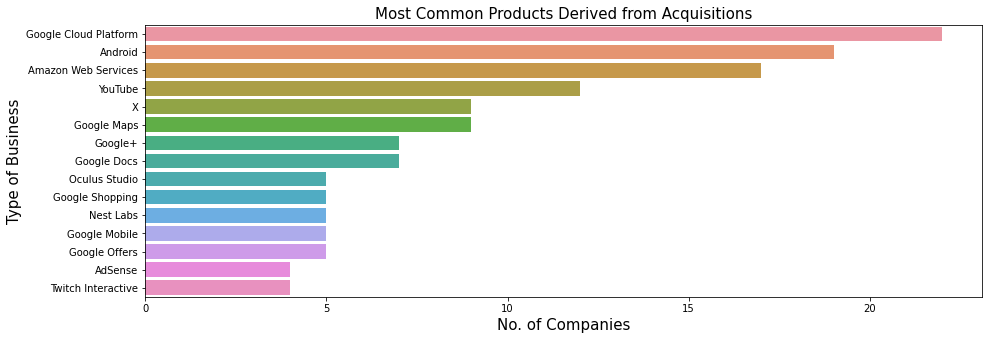

In [167]:
plt.figure(figsize=(15,5))
sns.barplot(data=new_product.head(15), x='Number of Companies', y='Derived Product')
plt.title("Most Common Products Derived from Acquisitions",fontsize=15)
plt.xlabel("No. of Companies", fontsize=15)
plt.ylabel("Type of Business", fontsize=15)
plt.show()

### Where do most acquisitions happen?

In [168]:
country = data['Country'].value_counts().reset_index()

In [169]:
country = country.rename({'index':'Country', 'Country':'Number of Companies'}, axis=1)

In [170]:
country.head(10)

,Country,Number of Companies
0,United States,248
1,United Kingdom,17
2,Canada,14
3,Ireland,9
4,Germany,7
5,Israel,6
6,France,5
7,Australia,5
8,India,4
9,Sweden,2


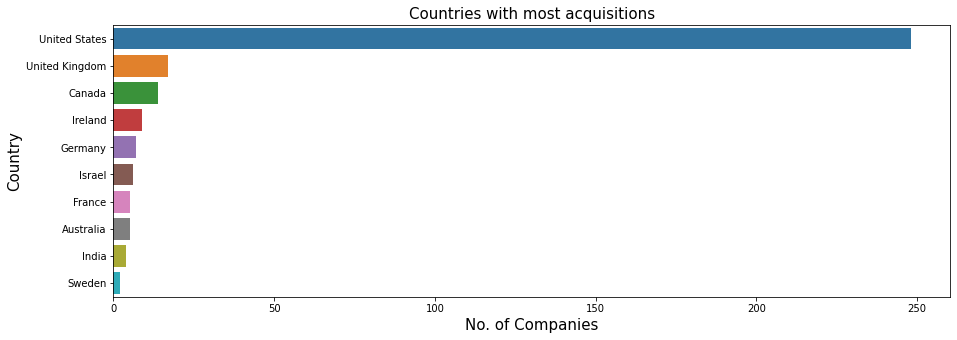

In [172]:
plt.figure(figsize=(15,5))
sns.barplot(data=country.head(10), x='Number of Companies', y='Country')
plt.title("Countries with most acquisitions",fontsize=15)
plt.xlabel("No. of Companies", fontsize=15)
plt.ylabel("Country", fontsize=15)
plt.show()

### Whats the average cost of acquiring a company?

In [173]:
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


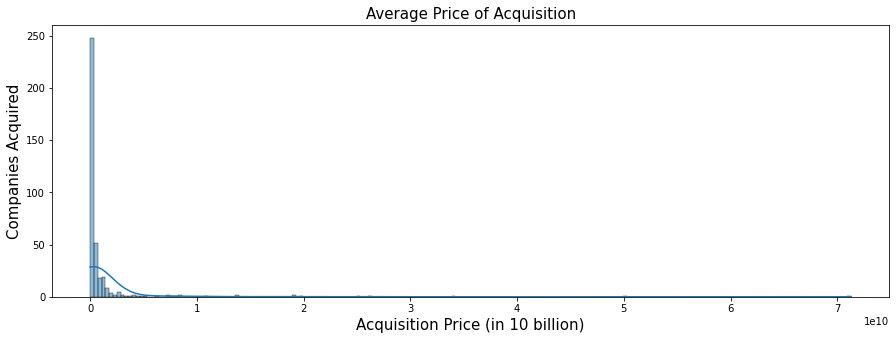

In [180]:
plt.figure(figsize=(15,5))
sns.histplot(x=data['Acquisition Price'], kde=True, bins=200)
plt.title("Average Price of Acquisition", fontsize=15)
plt.xlabel("Acquisition Price (in 10 billion)", fontsize=15)
plt.ylabel("Companies Acquired", fontsize=15)
plt.show()

### Top 10 most expensive acquisitions

In [187]:
most_expensive = data.sort_values('Acquisition Price', ascending=False).head(10)
most_expensive

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1402,1403,Disney,2019.0,Mar,21st Century Fox,NaN,NaN,7.130000e+10,NaN,NaN
168,169,Twitter,2015.0,Mar,Periscope,Live-video streaming,NaN,5.010000e+10,NaN,NaN
1190,1191,Ibm,2019.0,Jul,Red Hat,Provider of open source software and solutions,United States,3.400000e+10,NaN,NaN
872,873,Microsoft,2016.0,Dec,LinkedIn,Professional social network,NaN,2.620000e+10,NaN,NaN
350,351,Hp,2002.0,May,Compaq,Personal computer,NaN,2.500000e+10,NaN,NaN
917,918,Microsoft,2021.0,Apr,Nuance Communications,Speech synthesis and speech recognition,NaN,1.970000e+10,NaN,NaN
1303,1304,Facebook,2014.0,Feb,WhatsApp,NaN,United States,1.900000e+10,NaN,NaN
1390,1391,Disney,1996.0,Feb,Capital Cities/ABC Inc.,NaN,NaN,1.900000e+10,NaN,NaN
396,397,Hp,2008.0,Aug,Electronic Data Systems,Information technology consulting,NaN,1.390000e+10,NaN,NaN
267,268,Amazon,2017.0,Jun,Whole Foods Market,NaN,NaN,1.370000e+10,NaN,Whole Foods Market


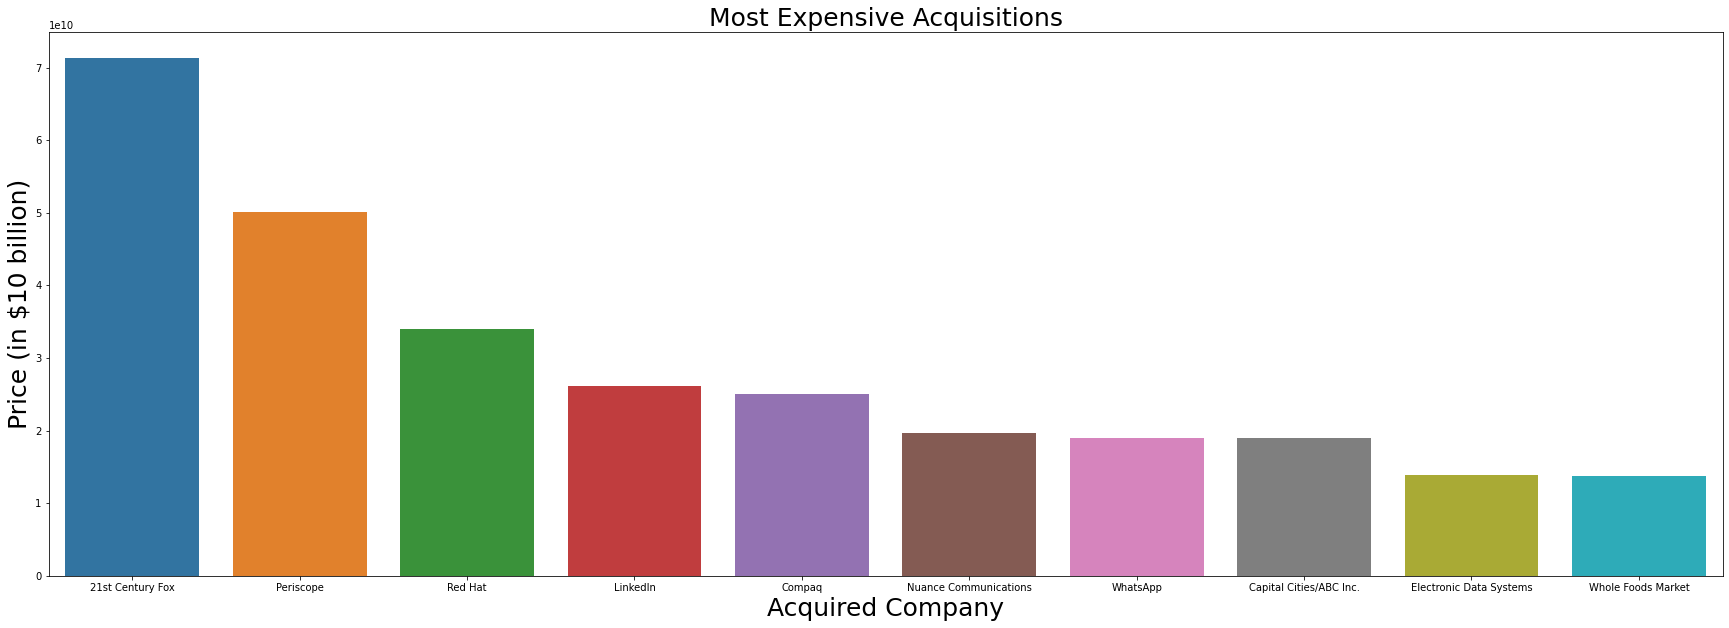

In [200]:
plt.figure(figsize=(30,10))
sns.barplot(data=most_expensive, x="Acquired Company", y="Acquisition Price")

plt.title("Most Expensive Acquisitions", fontsize=25)
plt.ylabel("Price (in $10 billion)", fontsize=25)
plt.xlabel("Acquired Company", fontsize=25)
plt.show()

### What does each company spend on average on an acquisition?

In [207]:
average_spend = data.groupby(['Parent Company']).mean().reset_index().sort_values('Acquisition Price', ascending=False)
average_spend

,Parent Company,ID,Acquisition Year,Acquisition Price
5,Disney,1394.0,1996.368421,8.137547e+09
13,Twitter,156.0,2013.984615,3.695226e+09
9,Hp,361.0,1999.891089,2.236599e+09
10,Ibm,1113.5,2010.109890,1.849158e+09
11,Microsoft,798.5,2008.445736,1.660034e+09
0,Adobe,1230.5,2006.365385,1.191624e+09
7,Facebook,1303.0,2014.258065,9.332577e+08
1,Amazon,242.5,2011.592593,8.416872e+08
6,Ebay,991.0,2008.317460,4.493438e+08
3,Blackberry,943.5,2010.312500,3.023906e+08


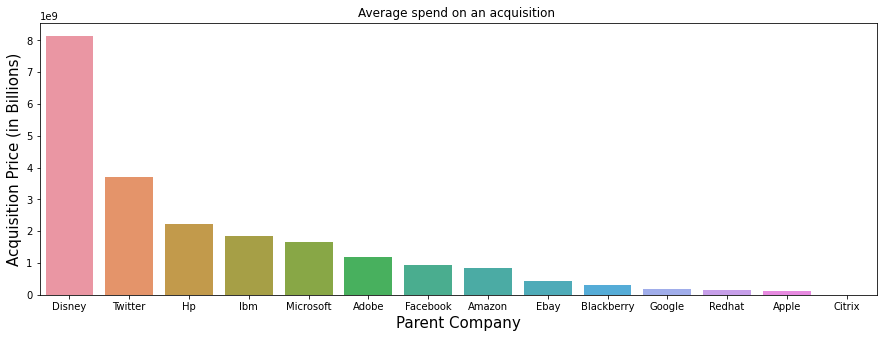

In [211]:
plt.figure(figsize=(15,5))
sns.barplot(data=average_spend, x='Parent Company', y = 'Acquisition Price')
plt.title('Average spend on an acquisition ')
plt.xlabel('Parent Company', fontsize=15)
plt.ylabel("Acquisition Price (in Billions)", fontsize=15)
plt.show()

### Has the price of acquiring a company changed over the years?

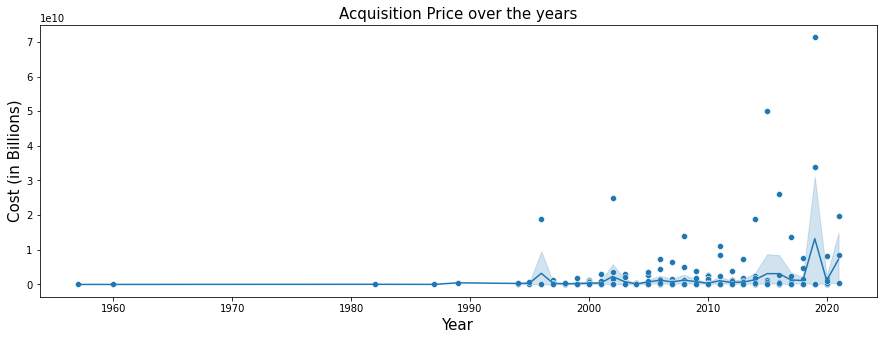

In [218]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data['Acquisition Year'], y=data['Acquisition Price'])
sns.scatterplot(x=data['Acquisition Year'], y=data['Acquisition Price'])
plt.title("Acquisition Price over the years",fontsize=15)
plt.ylabel("Cost (in Billions)", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.show()

## Rate of Acquisition

### Number of years company has actively acquired other companies

In [222]:
active_years = data.groupby(['Parent Company','Acquisition Year']).count().reset_index()

In [223]:
active_years

,Parent Company,Acquisition Year,ID,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,Adobe,1990.0,2,2,2,0,0,0,0,0
1,Adobe,1992.0,2,2,2,0,0,0,0,0
2,Adobe,1994.0,2,2,2,0,0,1,0,0
3,Adobe,1995.0,2,1,2,0,0,1,0,0
4,Adobe,1996.0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
293,Twitter,2016.0,3,3,3,3,3,1,0,0
294,Twitter,2018.0,1,1,1,1,1,1,0,0
295,Twitter,2019.0,3,3,3,3,2,0,0,0
296,Twitter,2020.0,3,3,3,3,3,0,0,0


In [224]:
active_years = active_years.groupby(['Parent Company']).count()

In [225]:
active_years

,Acquisition Year,ID,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
Parent Company,,,,,,,,,
Adobe,26,26,26,26,26,26,26,26,26
Amazon,21,21,21,21,21,21,21,21,21
Apple,23,23,23,23,23,23,23,23,23
Blackberry,13,13,13,13,13,13,13,13,13
Citrix,21,21,21,21,21,21,21,21,21
Disney,18,18,18,18,18,18,18,18,18
Ebay,22,22,22,22,22,22,22,22,22
Facebook,16,16,16,16,16,16,16,16,16
Google,20,20,20,20,20,20,20,20,20


### Number of Companies Acquired

In [226]:
data.groupby(['Parent Company']).count()

,ID,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
Parent Company,,,,,,,,,
Adobe,52,52,51,52,0,0,14,0,0
Amazon,108,108,106,108,0,0,39,0,83
Apple,123,123,114,123,123,0,39,0,0
Blackberry,32,32,32,32,32,0,8,0,0
Citrix,52,52,51,52,51,47,0,0,52
Disney,19,19,11,19,0,0,14,0,0
Ebay,63,63,63,63,63,0,32,0,0
Facebook,93,93,93,93,0,90,26,0,30
Google,244,244,243,244,244,0,49,0,238
